In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


# Cleaning and Normalizing Data

In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [10]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min() ) )

In [12]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [13]:
import tensorflow as tf

In [14]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [15]:
# Separate each column to a way tensorflow can recognize it, so later we can use it in a estimator class
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin') 
bmi = tf.feature_column.numeric_column('BMI')
diabites_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [16]:
# just an example of dealing with categorical data
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [17]:
# when you have too many groups in a categorical column
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

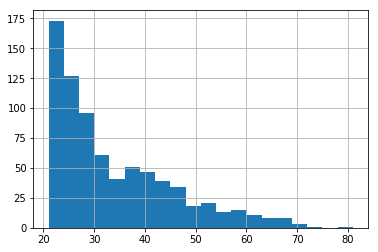

In [19]:
diabetes['Age'].hist(bins=20)

In [21]:
# divide the age column into categories
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [22]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabites_pedigree,assigned_group,age_bucket]

# Train test Split


In [23]:
x_data = diabetes.drop('Class',axis=1)

In [24]:
x_data

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,30,A
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,26,C
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,29,A
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,53,D
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,54,A


# Splitting the Dataset

Here we split the dataset into X_train (train dataset), X_test ( as our test dataset), y_train with the diabetes match of x_train data and y_test with the diabetes match of x_test data.

In [25]:
labels = diabetes['Class']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

# Using tensorflow 

Here we create the classifier, train and evaluate the previous data we splitted with tensorflows classifiers.

In [28]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [29]:
# Here we create 
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_model_dir': '/tmp/tmpqem6mtpq', '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_tf_random_seed': 1}


In [34]:
# Training our model 
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tmpqem6mtpq/model.ckpt-1000
INFO:tensorflow:Saving checkpoints for 1001 into /tmp/tmpqem6mtpq/model.ckpt.
INFO:tensorflow:step = 1001, loss = 4.96676
INFO:tensorflow:global_step/sec: 184.399
INFO:tensorflow:step = 1101, loss = 5.05067 (0.543 sec)
INFO:tensorflow:global_step/sec: 200.872
INFO:tensorflow:step = 1201, loss = 4.55991 (0.499 sec)
INFO:tensorflow:global_step/sec: 195.796
INFO:tensorflow:step = 1301, loss = 4.10481 (0.510 sec)
INFO:tensorflow:global_step/sec: 216.132
INFO:tensorflow:step = 1401, loss = 3.60741 (0.468 sec)
INFO:tensorflow:global_step/sec: 186.609
INFO:tensorflow:step = 1501, loss = 3.80098 (0.532 sec)
INFO:tensorflow:global_step/sec: 199.132
INFO:tensorflow:step = 1601, loss = 3.43182 (0.504 sec)
INFO:tensorflow:global_step/sec: 224.245
INFO:tensorflow:step = 1701, loss = 3.69372 (0.447 sec)
INFO:tensorflow:global_step/sec: 191.978
INFO:tensorflow:step = 1801, loss = 6.3

In [31]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                      y=y_test,
                                                      batch_size=10,
                                                      num_epochs=1,
                                                      shuffle=False)

In [32]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-10-23-12:35:46
INFO:tensorflow:Restoring parameters from /tmp/tmpqem6mtpq/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-10-23-12:35:48
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.748918, accuracy_baseline = 0.649351, auc = 0.806337, auc_precision_recall = 0.647483, average_loss = 0.524552, global_step = 1000, label/mean = 0.350649, loss = 5.04882, prediction/mean = 0.380955


In [33]:
results

{'accuracy': 0.74891776,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80633748,
 'auc_precision_recall': 0.64748347,
 'average_loss': 0.52455235,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0488162,
 'prediction/mean': 0.38095501}

# Making Predictions

Using the test data make predictions

In [50]:


pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,
                                                      batch_size=10,
                                                      num_epochs=1,
                                                     shuffle=False)

In [51]:
predictions = model.predict(pred_input_func)

In [52]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from /tmp/tmpqem6mtpq/model.ckpt-2000


In [53]:
my_pred

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.51504886], dtype=float32),
  'logits': array([ 0.06021357], dtype=float32),
  'probabilities': array([ 0.48495117,  0.51504886], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.70084614], dtype=float32),
  'logits': array([ 0.85133028], dtype=float32),
  'probabilities': array([ 0.29915389,  0.70084614], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.34206194], dtype=float32),
  'logits': array([-0.6541189], dtype=float32),
  'probabilities': array([ 0.65793806,  0.34206197], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.34370187], dtype=float32),
  'logits': array([-0.64684057], dtype=float32),
  'probabilities': array([ 0.65629816,  0.34370187], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array

In [54]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_model_dir': '/tmp/tmp_mnxkcti', '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_tf_random_seed': 1}


In [55]:
#You can't use the same input_func to train the DNN because we created our own 
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Error reported to Coordinator: <class 'IndexError'>, list index out of range
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp_mnxkcti/model.ckpt.


IndexError: list index out of range

In [56]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [57]:
feat_cols = feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabites_pedigree,embedded_group_col,
                         age_bucket]

In [58]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [64]:
#dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_steps': None, '_model_dir': '/tmp/tmpq8f96lsr', '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_tf_random_seed': 1}


In [65]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpq8f96lsr/model.ckpt.
INFO:tensorflow:step = 1, loss = 7.04595
INFO:tensorflow:global_step/sec: 211.837
INFO:tensorflow:step = 101, loss = 4.81754 (0.474 sec)
INFO:tensorflow:global_step/sec: 261.57
INFO:tensorflow:step = 201, loss = 4.97052 (0.393 sec)
INFO:tensorflow:global_step/sec: 229.82
INFO:tensorflow:step = 301, loss = 1.76252 (0.428 sec)
INFO:tensorflow:global_step/sec: 222.567
INFO:tensorflow:step = 401, loss = 4.38824 (0.454 sec)
INFO:tensorflow:global_step/sec: 205.879
INFO:tensorflow:step = 501, loss = 6.93569 (0.483 sec)
INFO:tensorflow:global_step/sec: 212.642
INFO:tensorflow:step = 601, loss = 3.73826 (0.472 sec)
INFO:tensorflow:global_step/sec: 178.053
INFO:tensorflow:step = 701, loss = 4.40959 (0.561 sec)
INFO:tensorflow:global_step/sec: 213.495
INFO:tensorflow:step = 801, loss = 3.10684 (0.473 sec)
INFO:tensorflow:global_step/sec: 213.64
INFO:tensorflow:step = 901, loss =

## Now we can evaluate our trained DNN

In [66]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [67]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2017-10-23-12:58:39
INFO:tensorflow:Restoring parameters from /tmp/tmpq8f96lsr/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2017-10-23-12:58:40
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.757576, accuracy_baseline = 0.649351, auc = 0.812922, auc_precision_recall = 0.676086, average_loss = 0.526157, global_step = 1000, label/mean = 0.350649, loss = 5.06426, prediction/mean = 0.357671


{'accuracy': 0.75757575,
 'accuracy_baseline': 0.64935064,
 'auc': 0.81292188,
 'auc_precision_recall': 0.67608643,
 'average_loss': 0.52615654,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0642571,
 'prediction/mean': 0.35767078}